### Sentiment Analysis


In [179]:
#!pip install textblob
import pandas as pd
import numpy as np
import re 
from textblob import TextBlob 
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [180]:
ceo_tweets=pd.read_csv('ceo_tweets_final.csv')
print(ceo_tweets[:5])
print(len(ceo_tweets))


   Unnamed: 0   username            id              date  \
0           0  @tim_cook  1.200060e+18  11/28/2019 14:35   
1           1  @tim_cook  1.200050e+18  11/28/2019 13:43   
2           2  @tim_cook  1.199870e+18   11/28/2019 2:09   
3           3  @tim_cook  1.199860e+18   11/28/2019 0:59   
4           4  @tim_cook  1.199770e+18  11/27/2019 19:09   

                                               tweet  retweets  likes  
0  On this #Thanksgiving, I am reflecting on the ...       546   4434  
1  Wishing everyone a #HappyThanksgiving filled w...       575   6097  
2  Tomorrow the incredible @MNightShyamalan’s ser...       412   2607  
3  Thanksgiving Day challenge! Close your rings w...       394   3932  
4  As many of you travel to be with loved ones to...      1310   8436  
60947


In [181]:
ceo_tweets["date"] = pd.to_datetime(ceo_tweets['date'])
ceo_tweets = ceo_tweets[ceo_tweets['date'].dt.year>2016]
ceo_tweets["date"]=ceo_tweets["date"].apply(lambda x: x.date())

In [182]:
ceo_tweets.groupby(['username'])['tweet'].count()

username
@Benioff            3230
@BillGates           983
@Bill_Gross         1463
@BoeingCEO           450
@ChuckRobbins        996
@IndraNooyi          147
@JeffBezos           150
@JohnLegere         3236
@LisaSu              172
@MichaelDell        1020
@WaltBettinger       449
@anandmahindra      3221
@aneelb              100
@bchesky             650
@drewhouston          75
@eldsjal             486
@elonmusk           3247
@jack               3225
@levie               538
@lloydblankfein       68
@marissamayer         78
@mtbarra             212
@richardbranson     3221
@rupertmurdoch         1
@satyanadella        501
@sundarpichai        432
@tim_cook            610
@toddmckinnon        181
@tonyfernandes      3196
@westernunionCEO     916
Name: tweet, dtype: int64

In [183]:
# Clean the tweets

def clean_tweet(tweet): 
        ''' 
        Utility function to clean tweet text by removing links, special characters 
        using simple regex statements. 
        '''
        return ' '.join(re.sub("([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split()) #(@[A-Za-z0-9]+)|

In [184]:
ceo_tweets['clean_tweets']=ceo_tweets['tweet'].map(clean_tweet)
ceo_tweets['tweet']=ceo_tweets['tweet'].map(str.lower)
ceo_tweets[:5]


Unnamed: 0   username            id        date  \
0           0  @tim_cook  1.200060e+18  2019-11-28   
1           1  @tim_cook  1.200050e+18  2019-11-28   
2           2  @tim_cook  1.199870e+18  2019-11-28   
3           3  @tim_cook  1.199860e+18  2019-11-28   
4           4  @tim_cook  1.199770e+18  2019-11-27   

                                               tweet  retweets  likes  \
0  on this #thanksgiving, i am reflecting on the ...       546   4434   
1  wishing everyone a #happythanksgiving filled w...       575   6097   
2  tomorrow the incredible @mnightshyamalan’s ser...       412   2607   
3  thanksgiving day challenge! close your rings w...       394   3932   
4  as many of you travel to be with loved ones to...      1310   8436   

                                        clean_tweets  
0  On this #Thanksgiving I am reflecting on the #...  
1  Wishing everyone a #HappyThanksgiving filled w...  
2  Tomorrow the incredible @MNightShyamalan’s ser...  
3  Thanksgiving Day challenge Close your rings wi...  
4  As many of you travel to be with loved ones to...

In [185]:
# Sentiment Analysis function:

def get_tweet_sentiment(tweet): 
        ''' 
        Utility function to classify sentiment of passed tweet 
        using textblob's sentiment method 
        '''
        # create TextBlob object of passed tweet text 
        analysis = TextBlob(tweet) 
        return analysis.sentiment.polarity
        
def sentiment_buckets(score):
        # set sentiment : 5% offset
        if score > 0.05: 
            return 'positive'
        elif score < -0.05: 
            return 'negative'
        else: 
            return 'neutral'

In [223]:
ceo_tweets['sentiment_score']=ceo_tweets['clean_tweets'].map(get_tweet_sentiment)
ceo_tweets['sentiment_bucket']=ceo_tweets['sentiment_score'].map(sentiment_buckets)
ceo_tweets[:5]


Unnamed: 0   username            id        date  \
0           0  @tim_cook  1.200060e+18  2019-11-28   
1           1  @tim_cook  1.200050e+18  2019-11-28   
2           2  @tim_cook  1.199870e+18  2019-11-28   
3           3  @tim_cook  1.199860e+18  2019-11-28   
4           4  @tim_cook  1.199770e+18  2019-11-27   

                                               tweet  retweets  likes  \
0  on this #thanksgiving, i am reflecting on the ...       546   4434   
1  wishing everyone a #happythanksgiving filled w...       575   6097   
2  tomorrow the incredible @mnightshyamalan’s ser...       412   2607   
3  thanksgiving day challenge! close your rings w...       394   3932   
4  as many of you travel to be with loved ones to...      1310   8436   

                                        clean_tweets  sentiment_score  \
0  On this #Thanksgiving I am reflecting on the #...         0.400000   
1  Wishing everyone a #HappyThanksgiving filled w...         0.633333   
2  Tomorrow the incredible @MNightShyamalan’s ser...         0.900000   
3  Thanksgiving Day challenge Close your rings wi...         0.000000   
4  As many of you travel to be with loved ones to...         0.550000   

  sentiment_bucket  ... work business company  emotion  social  technology  \
0         positive  ...    0        0       0        1       0           0   
1         positive  ...    0        0       0        0       0           0   
2         positive  ...    0        0       1        0       0           0   
3          neutral  ...    0        0       0        0       0           0   
4         positive  ...    0        0       0        0       0           0   

   general  personal  product  politics  
0        0         1        0         0  
1        0         0        0         0  
2        0         0        0         0  
3        0         1        0         0  
4        0         0        0         0  

[5 rows x 23 columns]

### Sentiment EDA:

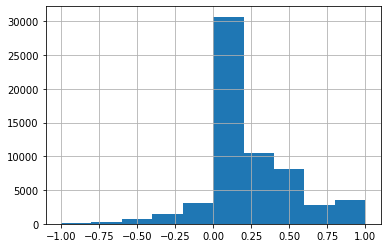

In [89]:
# sentiment EDA :
#ceo_tweets['sentiment_score'].hist()

In [11]:
# CEO level sentiment EDA:

#ceo_tweets.groupby('username')['sentiment_score'].agg(['min','max','mean','median'])

min  max      mean    median
username                                           
@Benioff         -1.000000  1.0  0.178951  0.100000
@BillGates       -1.000000  1.0  0.222096  0.177951
@Bill_Gross      -1.000000  1.0  0.206120  0.168182
@BoeingCEO       -0.500000  1.0  0.288584  0.250000
@ChuckRobbins    -1.000000  1.0  0.367338  0.400000
@IndraNooyi      -0.800000  1.0  0.272193  0.254167
@JeffBezos       -0.316667  1.0  0.252617  0.200000
@JohnLegere      -1.000000  1.0  0.190867  0.000000
@LisaSu           0.000000  1.0  0.442633  0.430000
@MichaelDell     -1.000000  1.0  0.245472  0.180000
@WaltBettinger   -1.000000  1.0  0.284364  0.250000
@anandmahindra   -0.800000  1.0  0.179197  0.072917
@aneelb          -0.800000  1.0  0.241257  0.200000
@bchesky         -1.000000  1.0  0.179706  0.068182
@drewhouston     -1.000000  1.0  0.184406  0.100000
@eldsjal         -1.000000  1.0  0.177724  0.000000
@elonmusk        -1.000000  1.0  0.121998  0.000000
@jack            -1.000000  1.0  0.142408  0.000000
@levie           -1.000000  1.0  0.110592  0.000000
@lloydblankfein  -0.500000  1.0  0.149453  0.071250
@manpowergroupjj -0.714286  1.0  0.127417  0.001246
@marissamayer    -0.750000  1.0  0.229733  0.169091
@mtbarra         -0.750000  1.0  0.310127  0.266667
@richardbranson  -1.000000  1.0  0.266415  0.233333
@rupertmurdoch   -1.000000  1.0  0.142456  0.107738
@satyanadella    -1.000000  1.0  0.223138  0.150000
@sundarpichai    -1.000000  1.0  0.235074  0.200000
@tim_cook        -1.000000  1.0  0.303983  0.300000
@toddmckinnon    -0.800000  1.0  0.237386  0.200000
@tonyfernandes   -1.000000  1.0  0.202112  0.125000
@westernunionCEO -1.000000  1.0  0.196113  0.066667

In [21]:
# df_sent_bucket=pd.DataFrame(ceo_tweets.groupby(['username','sentiment_bucket'])['sentiment_score'].agg('count'))

# df_sent_bucket=df_sent_bucket.reset_index()
# df_sent_bucket.columns=['username','sentiment_bucket','tweet_cnt']
# df_sent_bucket[:5]

username sentiment_bucket  tweet_cnt
0    @Benioff         negative        254
1    @Benioff          neutral       1255
2    @Benioff         positive       1721
3  @BillGates         negative        272
4  @BillGates          neutral        967

In [23]:
#pivot the results
# df_sent_pivot= pd.pivot_table(df_sent_bucket,index=["username"],columns=["sentiment_bucket"]).fillna(0)
# df_sent_pivot['perc_negative']=df_sent_pivot['tweet_cnt']['negative']*100/(df_sent_pivot['tweet_cnt']['negative']+df_sent_pivot['tweet_cnt']['positive']+df_sent_pivot['tweet_cnt']['neutral'])
# df_sent_pivot['perc_positive']=df_sent_pivot['tweet_cnt']['positive']*100/(df_sent_pivot['tweet_cnt']['negative']+df_sent_pivot['tweet_cnt']['positive']+df_sent_pivot['tweet_cnt']['neutral'])
# df_sent_pivot['perc_neutral']=df_sent_pivot['tweet_cnt']['neutral']*100/(df_sent_pivot['tweet_cnt']['negative']+df_sent_pivot['tweet_cnt']['positive']+df_sent_pivot['tweet_cnt']['neutral'])

# df_sent_pivot

tweet_cnt                  perc_negative perc_positive  \
sentiment_bucket  negative neutral positive                               
username                                                                  
@Benioff             254.0  1255.0   1721.0      7.863777     53.281734   
@BillGates           272.0   967.0   1977.0      8.457711     61.473881   
@Bill_Gross          298.0   965.0   1984.0      9.177702     61.102556   
@BoeingCEO            10.0   101.0    339.0      2.222222     75.333333   
@ChuckRobbins         57.0   408.0   1181.0      3.462940     71.749696   
@IndraNooyi           11.0    49.0    122.0      6.043956     67.032967   
@JeffBezos            14.0    72.0    142.0      6.140351     62.280702   
@JohnLegere          146.0  1831.0   1259.0      4.511743     38.906057   
@LisaSu                0.0     9.0    163.0      0.000000     94.767442   
@MichaelDell         100.0  1181.0   1908.0      3.135779     59.830668   
@WaltBettinger        85.0   417.0   1097.0      5.315822     68.605378   
@anandmahindra       242.0  1331.0   1648.0      7.513195     51.164235   
@aneelb              103.0   422.0    775.0      7.923077     59.615385   
@bchesky             229.0  1346.0   1611.0      7.187696     50.564972   
@drewhouston          46.0   150.0    234.0     10.697674     54.418605   
@eldsjal             220.0  1448.0   1521.0      6.898714     47.695202   
@elonmusk            299.0  1624.0   1324.0      9.208500     40.776101   
@jack                179.0  1856.0   1190.0      5.550388     36.899225   
@levie               536.0  1195.0   1487.0     16.656308     46.208825   
@lloydblankfein       11.0    21.0     36.0     16.176471     52.941176   
@manpowergroupjj     308.0  1136.0   1274.0     11.331862     46.872701   
@marissamayer         72.0   513.0    827.0      5.099150     58.569405   
@mtbarra              15.0   153.0    356.0      2.862595     67.938931   
@richardbranson      225.0   866.0   2130.0      6.985408     66.128532   
@rupertmurdoch       314.0   419.0    983.0     18.298368     57.284382   
@satyanadella         46.0   377.0    618.0      4.418828     59.365994   
@sundarpichai         74.0   394.0    808.0      5.799373     63.322884   
@tim_cook             43.0   246.0    630.0      4.678999     68.552775   
@toddmckinnon         88.0   446.0    815.0      6.523351     60.415122   
@tonyfernandes       277.0  1171.0   1748.0      8.667084     54.693367   
@westernunionCEO      88.0   947.0   1061.0      4.198473     50.620229   

                 perc_neutral  
sentiment_bucket               
username                       
@Benioff            38.854489  
@BillGates          30.068408  
@Bill_Gross         29.719741  
@BoeingCEO          22.444444  
@ChuckRobbins       24.787363  
@IndraNooyi         26.923077  
@JeffBezos          31.578947  
@JohnLegere         56.582200  
@LisaSu              5.232558  
@MichaelDell        37.033553  
@WaltBettinger      26.078799  
@anandmahindra      41.322571  
@aneelb             32.461538  
@bchesky            42.247332  
@drewhouston        34.883721  
@eldsjal            45.406083  
@elonmusk           50.015399  
@jack               57.550388  
@levie              37.134866  
@lloydblankfein     30.882353  
@manpowergroupjj    41.795438  
@marissamayer       36.331445  
@mtbarra            29.198473  
@richardbranson     26.886060  
@rupertmurdoch      24.417249  
@satyanadella       36.215178  
@sundarpichai       30.877743  
@tim_cook           26.768226  
@toddmckinnon       33.061527  
@tonyfernandes      36.639549  
@westernunionCEO    45.181298

In [229]:
# Levie analysis
ceo_tweets[(ceo_tweets['username']=='@lloydblankfein') & (ceo_tweets['sentiment_score']<-0.05 )][['tweet','username','sentiment_score']].sort_values(by='sentiment_score',ascending = True)

tweet         username  \
34906  still thinking about #bitcoin. no conclusion -...  @lloydblankfein   
34877  the house not focusing on anti-semitism but in...  @lloydblankfein   
34922  leadership helps 🇺🇸our language is dominant; $...  @lloydblankfein   
34878  after killing amazon's nyc hq, not sure some p...  @lloydblankfein   
34867  uh-oh. can another round of tariffs be far beh...  @lloydblankfein   
34866  don't know why sen. sanders picks on a retiree...  @lloydblankfein   
34914  every now and then, david lets his hair down.....  @lloydblankfein   
34919  congrats to @jeffimmelt for leading ge thru 9/...  @lloydblankfein   
34909  immigration is a complex issue but i wouldn't ...  @lloydblankfein   
34917  rt @goldmansachs: $gs ceo @lloydblankfein on t...  @lloydblankfein   
34911  wish the moon wasn't the only thing casting a ...  @lloydblankfein   

       sentiment_score  
34906        -0.500000  
34877        -0.483333  
34922        -0.350000  
34878        -0.250000  
34867        -0.166667  
34866        -0.155556  
34914        -0.155556  
34919        -0.150000  
34909        -0.150000  
34917        -0.100000  
34911        -0.062500

### Bag of words analysis

In [187]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import nltk
from nltk import pos_tag, word_tokenize
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt

from sklearn.manifold import MDS
from sklearn.metrics import euclidean_distances

In [188]:
## Removing stop words, punctuation and tokenizing

import nltk
nltk.download('stopwords')
nltk.download('punkt')
stop = stopwords.words('english')

ceo_tweets["clean_tweets"] = ceo_tweets["clean_tweets"].astype(str)
ceo_tweets["tweet_tokens"] = ceo_tweets["clean_tweets"].apply(lambda each_post: word_tokenize(re.sub(r'[^\w\s]',' ',each_post.lower())))
ceo_tweets["tweet_tokens"] = ceo_tweets["tweet_tokens"].apply(lambda list_of_words: [x for x in list_of_words if x not in stop])

ceo_tweets[:5]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aishw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aishw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Unnamed: 0   username            id        date  \
0           0  @tim_cook  1.200060e+18  2019-11-28   
1           1  @tim_cook  1.200050e+18  2019-11-28   
2           2  @tim_cook  1.199870e+18  2019-11-28   
3           3  @tim_cook  1.199860e+18  2019-11-28   
4           4  @tim_cook  1.199770e+18  2019-11-27   

                                               tweet  retweets  likes  \
0  on this #thanksgiving, i am reflecting on the ...       546   4434   
1  wishing everyone a #happythanksgiving filled w...       575   6097   
2  tomorrow the incredible @mnightshyamalan’s ser...       412   2607   
3  thanksgiving day challenge! close your rings w...       394   3932   
4  as many of you travel to be with loved ones to...      1310   8436   

                                        clean_tweets  sentiment_score  \
0  On this #Thanksgiving I am reflecting on the #...         0.400000   
1  Wishing everyone a #HappyThanksgiving filled w...         0.633333   
2  Tomorrow the incredible @MNightShyamalan’s ser...         0.900000   
3  Thanksgiving Day challenge Close your rings wi...         0.000000   
4  As many of you travel to be with loved ones to...         0.550000   

  sentiment_bucket                                       tweet_tokens  
0         positive  [thanksgiving, reflecting, dreamers, enjoy, da...  
1         positive  [wishing, everyone, happythanksgiving, filled,...  
2         positive  [tomorrow, incredible, mnightshyamalan, series...  
3          neutral  [thanksgiving, day, challenge, close, rings, f...  
4         positive  [many, travel, loved, ones, today, remember, p...

In [189]:
#Obtain POS for the tokens
import nltk
nltk.download('averaged_perceptron_tagger')
ceo_tweets['pos']=ceo_tweets['tweet_tokens'].apply(nltk.tag.pos_tag)
ceo_tweets[:5]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\aishw\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Unnamed: 0   username            id        date  \
0           0  @tim_cook  1.200060e+18  2019-11-28   
1           1  @tim_cook  1.200050e+18  2019-11-28   
2           2  @tim_cook  1.199870e+18  2019-11-28   
3           3  @tim_cook  1.199860e+18  2019-11-28   
4           4  @tim_cook  1.199770e+18  2019-11-27   

                                               tweet  retweets  likes  \
0  on this #thanksgiving, i am reflecting on the ...       546   4434   
1  wishing everyone a #happythanksgiving filled w...       575   6097   
2  tomorrow the incredible @mnightshyamalan’s ser...       412   2607   
3  thanksgiving day challenge! close your rings w...       394   3932   
4  as many of you travel to be with loved ones to...      1310   8436   

                                        clean_tweets  sentiment_score  \
0  On this #Thanksgiving I am reflecting on the #...         0.400000   
1  Wishing everyone a #HappyThanksgiving filled w...         0.633333   
2  Tomorrow the incredible @MNightShyamalan’s ser...         0.900000   
3  Thanksgiving Day challenge Close your rings wi...         0.000000   
4  As many of you travel to be with loved ones to...         0.550000   

  sentiment_bucket                                       tweet_tokens  \
0         positive  [thanksgiving, reflecting, dreamers, enjoy, da...   
1         positive  [wishing, everyone, happythanksgiving, filled,...   
2         positive  [tomorrow, incredible, mnightshyamalan, series...   
3          neutral  [thanksgiving, day, challenge, close, rings, f...   
4         positive  [many, travel, loved, ones, today, remember, p...   

                                                 pos  
0  [(thanksgiving, VBG), (reflecting, VBG), (drea...  
1  [(wishing, VBG), (everyone, NN), (happythanksg...  
2  [(tomorrow, NN), (incredible, JJ), (mnightshya...  
3  [(thanksgiving, VBG), (day, NN), (challenge, V...  
4  [(many, JJ), (travel, NN), (loved, VBD), (ones...

In [190]:
# Extract the list of nouns :
ceo_tweets['nouns']=ceo_tweets['pos'].apply(lambda pos_list: [x[0] for x in pos_list if x[1].startswith('NN')])
ceo_tweets[:5]

Unnamed: 0   username            id        date  \
0           0  @tim_cook  1.200060e+18  2019-11-28   
1           1  @tim_cook  1.200050e+18  2019-11-28   
2           2  @tim_cook  1.199870e+18  2019-11-28   
3           3  @tim_cook  1.199860e+18  2019-11-28   
4           4  @tim_cook  1.199770e+18  2019-11-27   

                                               tweet  retweets  likes  \
0  on this #thanksgiving, i am reflecting on the ...       546   4434   
1  wishing everyone a #happythanksgiving filled w...       575   6097   
2  tomorrow the incredible @mnightshyamalan’s ser...       412   2607   
3  thanksgiving day challenge! close your rings w...       394   3932   
4  as many of you travel to be with loved ones to...      1310   8436   

                                        clean_tweets  sentiment_score  \
0  On this #Thanksgiving I am reflecting on the #...         0.400000   
1  Wishing everyone a #HappyThanksgiving filled w...         0.633333   
2  Tomorrow the incredible @MNightShyamalan’s ser...         0.900000   
3  Thanksgiving Day challenge Close your rings wi...         0.000000   
4  As many of you travel to be with loved ones to...         0.550000   

  sentiment_bucket                                       tweet_tokens  \
0         positive  [thanksgiving, reflecting, dreamers, enjoy, da...   
1         positive  [wishing, everyone, happythanksgiving, filled,...   
2         positive  [tomorrow, incredible, mnightshyamalan, series...   
3          neutral  [thanksgiving, day, challenge, close, rings, f...   
4         positive  [many, travel, loved, ones, today, remember, p...   

                                                 pos  \
0  [(thanksgiving, VBG), (reflecting, VBG), (drea...   
1  [(wishing, VBG), (everyone, NN), (happythanksg...   
2  [(tomorrow, NN), (incredible, JJ), (mnightshya...   
3  [(thanksgiving, VBG), (day, NN), (challenge, V...   
4  [(many, JJ), (travel, NN), (loved, VBD), (ones...   

                                               nouns  
0                   [dreamers, day, friends, family]  
1     [everyone, joy, amp, happiness, today, thankf]  
2  [tomorrow, mnightshyamalan, series, servant, a...  
3                        [day, rings, family, badge]  
4            [travel, ones, today, thing, time, tog]

In [13]:
#ceo_tweets.to_csv('ceo_tweets.csv')

In [31]:
#Filter the noun list only to make the list of attributes 
# noun_lst = ceo_tweets['nouns'].apply(pd.Series).stack().unique()

# # get the frequencies for the nouns:
# noun_df= pd.DataFrame(noun_lst)
# noun_df.columns=['nouns']
# noun_df[:5]

nouns
0  dreamers
1       day
2   friends
3    family
4  everyone

In [37]:
## get frequency of all words
# all_words = ceo_tweets['nouns'].sum()
# freq_dist = nltk.FreqDist(all_words)

# df_fdist=pd.DataFrame(list(freq_dist.items()), columns=['term', 'freq'])

# noun_freq_df = pd.merge(noun_df, df_fdist, right_on='term', left_on='nouns')
# noun_freq_df[:5]

nouns      term  freq
0  dreamers  dreamers    32
1       day       day  1461
2   friends   friends   237
3    family    family   416
4  everyone  everyone   691

In [36]:
# Export the file :
# noun_freq_df.to_csv('nouns_tweets.csv')

#### Instgram followers, following , posts (for influence score)



In [175]:
#Function to get instagram info for the CEOs

# import requests
# import urllib.request
# import urllib.parse
# import urllib.error
# from bs4 import BeautifulSoup
# import ssl
# import json

# df_insta=pd.DataFrame(columns=['insta_user','insta_followers','insta_following','insta_posts'])

# def get_insta_info(url):
#         html = urllib.request.urlopen(url).read()
#         soup = BeautifulSoup(html, 'html.parser')
#         data = soup.find_all('meta', attrs={'property': 'og:description'
#                              })
#         text = data[0].get('content').split()
#         user = '%s %s %s' % (text[-3], text[-2], text[-1])
#         followers = text[0]
#         following = text[2]
#         posts = text[4]
#         print ('User:', user)
#         print ('Followers:', followers)
#         print ('Following:', following)
#         print ('Posts:', posts)
#         print ('---------------------------')
#         df_insta.loc[len(df_insta)]=[user,followers,following,posts]
#         print(df_insta)
        

# get_insta_info('https://www.instagram.com/thisisbillgates/')




User: Bill Gates (@thisisbillgates)
Followers: 4.1m
Following: 32
Posts: 130
---------------------------
                            user followers following posts
0  Bill Gates (@thisisbillgates)      4.1m        32   130


### Tweet topics - manual way

In [191]:
topic_df=pd.read_csv('topic_manual.csv')
topic_df[:5]

nouns     Topic
0      team      work
1      work      work
2  business  business
3      jobs      work
4      dell   company

In [192]:
#create array of topics
topic=['work','business','company','emotion','social','technology','general','personal','product','politics']


In [193]:
#Code to create topc flags

def flag_def(x):
    temp=sum(x)
    if temp>0:
        return 1
    else :
        return 0

for i in topic:
    print(i)
    temp_lst=list(topic_df[topic_df['Topic']==str(i)]['nouns'])
    ceo_tweets[i]= ceo_tweets['tweet_tokens'].apply(lambda list_of_words: [1 if x in temp_lst else 0 for x in list_of_words])
    ceo_tweets[i]=ceo_tweets[i].map(flag_def)

work
business
company
emotion
social
technology
general
personal
product
politics


In [281]:
#max(ceo_tweets['personal'])

In [282]:
#ceo_tweets.columns

In [284]:
#ceo_tweets.groupby(['username'])[['work','business','company','emotion','social','technology','general','personal','product','politics']].sum()

work  business  company  emotion  social  technology  \
username                                                                 
@anandmahindra     221       439      287      347     325          76   
@aneelb             14        19       64       19      12           6   
@bchesky            39       101      208       62      86          15   
@benioff           293       706      641      353     721         198   
@bill_gross         79       193       82      192     180         162   
@billgates          81       145       11      124     440          83   
@boeingceo         148       146      213       83      78          22   
@chuckrobbins      253       298      470      275     141          54   
@drewhouston        15        16       32        8      10          10   
@eldsjal            32        41      155       57      33          23   
@elonmusk           98       181     1073      169     157         337   
@indranooyi         14        32       34       30      55           3   
@jack              192       154      309      205     215         132   
@jeffbezos          26        13       22       31      18           6   
@johnlegere        222       186     1092      375      70          34   
@levie              59       149      124       42      56          74   
@lisasu             26        46       84       53      13          13   
@lloydblankfein      6        16        1       10      23           1   
@marissamayer       12        12       15       13       7          10   
@michaeldell       162       270      444      150      90         151   
@mtbarra            42        68       72       46      37          12   
@richardbranson    315       552      318      452     472          53   
@rupertmurdoch       0         0        0        0       0           0   
@satyanadella       80       141      140       51     113         132   
@sundarpichai       59        77       88       63      61          73   
@tim_cook          101        96      137      133     155          36   
@toddmckinnon       35        24       69       31       8          18   
@tonyfernandes     293       459      538      396     237          60   
@waltbettinger      91       152      153       86      49          20   
@westernunionceo    86       239      452      117     203          26   

                  general  personal  product  politics  
username                                                
@anandmahindra         86       141      160        85  
@aneelb                 1         7        4         0  
@bchesky               13        76       30        14  
@benioff              235       139      177        69  
@bill_gross            24        27      120        26  
@billgates             68        61       27        21  
@boeingceo              6        14       73         2  
@chuckrobbins          26        67       38        12  
@drewhouston            2         6        8         0  
@eldsjal               15        25       15         3  
@elonmusk              36        36      369         4  
@indranooyi             5        18        2         1  
@jack                  60        71       82        17  
@jeffbezos              0         6       10         0  
@johnlegere            53        67      205         7  
@levie                 16        12       73        14  
@lisasu                 3        16       27         0  
@lloydblankfein         2         4        0         4  
@marissamayer           2         9        8         3  
@michaeldell            6        41       69         2  
@mtbarra                5        13       16         0  
@richardbranson        77       115      398        37  
@rupertmurdoch          0         0        0         0  
@satyanadella          15        10       94         5  
@sundarpichai          12        11       52         5  
@tim_cook              16        62       74         0  
@toddmckinnon           6         8        7         

### Linear Regression

#### Data Pre-processing:

In [194]:
reg_ip_df=pd.read_csv('regression_ip.csv')
reg_ip_df[:5]

Ticker            ceo company  ceo_age  ceo_gender  ceo_compensation  \
0   AABA  @marissamayer   yahoo       44         0.0              4.00   
1   AAPL      @tim_cook   apple       59         1.0            141.60   
2    AMD        @LisaSu     amd       50         0.0             13.35   
3   AMZN     @JeffBezos  amazon       55         1.0              1.68   
4     BA     @BoeingCEO  boeing       55         1.0             23.40   

   glasdoor_ceo_approval  twitter_followers  perc_held_insiders_1  \
0                   0.85            1624782                   NaN   
1                   0.91           11599990                  0.07   
2                   0.97              44516                  0.80   
3                   0.86            1108303                 16.12   
4                   0.79              24172                  0.07   

   perc_held_institutions1  ...  short_perc_float_nov  \
0                      NaN  ...                   NaN   
1                    60.95  ...                  0.97   
2                    66.97  ...                 11.06   
3                    57.12  ...                  0.92   
4                    70.56  ...                  1.08   

   short_perc_shares_outstanding_nov  short_ratio_nov    total_cash  \
0                                NaN              NaN           NaN   
1                               1.04             1.94  1.010000e+11   
2                              10.44             2.18  1.210000e+09   
3                               0.77             1.27  4.340000e+10   
4                               1.08             1.06  1.091000e+10   

   total_cash_per_share      tot_debt  total_debt_equity  \
0                   NaN           NaN                NaN   
1                 22.63  1.080000e+11             119.40   
2                  1.09  1.110000e+09              51.06   
3                 87.54  7.459000e+10             132.00   
4                 19.39  2.588000e+10                NaN   

   trailing_annual_dividend_rate3  trailing_annual_dividend_yield3  \
0                             NaN                              NaN   
1                            3.00                             1.12   
2                             NaN                              NaN   
3                             NaN                              NaN   
4                            7.88                             2.14   

   trailing_pe   
0           NaN  
1         22.48  
2        204.97  
3         79.79  
4         55.11  

[5 rows x 58 columns]

In [195]:
#Impute nulls by mean of the column
cols=list(reg_ip_df.columns)[3:]
cols
for i in cols:
    reg_ip_df[i] = reg_ip_df[i].fillna((reg_ip_df[i].mean()))
#reg_ip_df[.apply(lambda x: x.fillna(x.mean()),axis=0)

In [321]:
#reg_ip_df.columns

In [322]:
#reg_ip_df[:5]

In [196]:
#lower username in both the tables:

reg_ip_df['ceo']=reg_ip_df['ceo'].map(str.lower)
ceo_tweets['username']=ceo_tweets['username'].map(str.lower)

# Inner join on both the tables:

ceo_tweets_merge=ceo_tweets.merge(reg_ip_df, right_on='ceo',left_on='username',how='inner')
ceo_tweets_merge[:2]


Unnamed: 0   username            id        date  \
0           0  @tim_cook  1.200060e+18  2019-11-28   
1           1  @tim_cook  1.200050e+18  2019-11-28   

                                               tweet  retweets  likes  \
0  on this #thanksgiving, i am reflecting on the ...       546   4434   
1  wishing everyone a #happythanksgiving filled w...       575   6097   

                                        clean_tweets  sentiment_score  \
0  On this #Thanksgiving I am reflecting on the #...         0.400000   
1  Wishing everyone a #HappyThanksgiving filled w...         0.633333   

  sentiment_bucket  ... short_perc_float_nov  \
0         positive  ...                 0.97   
1         positive  ...                 0.97   

  short_perc_shares_outstanding_nov short_ratio_nov    total_cash  \
0                              1.04            1.94  1.010000e+11   
1                              1.04            1.94  1.010000e+11   

   total_cash_per_share      tot_debt  total_debt_equity  \
0                 22.63  1.080000e+11              119.4   
1                 22.63  1.080000e+11              119.4   

   trailing_annual_dividend_rate3  trailing_annual_dividend_yield3  \
0                             3.0                             1.12   
1                             3.0                             1.12   

   trailing_pe   
0         22.48  
1         22.48  

[2 rows x 81 columns]

In [197]:
# # Quality Check
# len(ceo_tweets) #33254
# len(ceo_tweets_merge) #23741
# ceo_tweets_merge.groupby(['username'])['tweet'].count()  # Looks fine
ceo_tweets_merge['company_y'].unique()

array(['apple', 'tesla', 'mahindra', nan, 'boeing', 'spotify', 'tmobile',
       'google', 'box', 'goldman', 'dell', 'news_corp', 'microsoft',
       'schwabs', 'yahoo', 'okta', 'twitter', 'workday',
       'general1_motors', 'dropbox', 'pepsico', 'westernunion', 'cisco',
       'amazon', 'amd'], dtype=object)

In [198]:
# create flag for each company_x

company= list(ceo_tweets_merge['company_y'].unique())

for i in company:
    ceo_tweets_merge[i]=ceo_tweets_merge['company_y'].apply(lambda x: 1 if x==str(i) else 0)


In [199]:
ceo_tweets_merge[:4][['username','apple']]

username  apple
0  @tim_cook      1
1  @tim_cook      1
2  @tim_cook      1
3  @tim_cook      1

In [200]:
ceo_tweets_merge['company_y'].unique()
ceo_tweets_merge['company_x'].isnull().sum()

0

In [201]:
# add date level strock prices 
stock_df=pd.read_csv('dayStockData.csv')
stock_df[:2]

Date        Open        High         Low       Close  Adj_Close  \
0  1/4/2016  102.610001  105.370003  102.000000  105.349998  98.446655   
1  1/5/2016  105.750000  105.849998  102.410004  102.709999  95.979675   

       Volume Tickr  daily_returns  
0  67649400.0  AAPL            NaN  
1  55791000.0  AAPL       -2.46698

In [202]:
stock_df['vol_lag'] = stock_df.sort_values(by='Date', ascending=True).groupby(['Tickr'])['Volume'].shift(-1)
stock_df[:5]

Date        Open        High         Low       Close  Adj_Close  \
0  1/4/2016  102.610001  105.370003  102.000000  105.349998  98.446655   
1  1/5/2016  105.750000  105.849998  102.410004  102.709999  95.979675   
2  1/6/2016  100.559998  102.370003   99.870003  100.699997  94.101387   
3  1/7/2016   98.680000  100.129997   96.430000   96.449997  90.129868   
4  1/8/2016   98.550003   99.110001   96.760002   96.959999  90.606438   

       Volume Tickr  daily_returns     vol_lag  
0  67649400.0  AAPL            NaN  21118100.0  
1  55791000.0  AAPL      -2.466980  22193600.0  
2  68457400.0  AAPL      -1.878288  31751900.0  
3  81094400.0  AAPL      -3.971519  54777800.0  
4  70798000.0  AAPL       0.476570  20567800.0

In [203]:
# Convert to date time 
ceo_tweets_merge['date']=ceo_tweets_merge['date'].map(pd.to_datetime)
stock_df['Date']=stock_df['Date'].map(pd.to_datetime)

In [204]:
#merge with stock and other attribtues
tweet_final=ceo_tweets_merge.merge(stock_df[['Date','daily_returns','Adj_Close','Tickr','Volume','vol_lag']], right_on=['Tickr','Date'],left_on=['Ticker','date'])

tweet_final[:2]

Unnamed: 0   username            id       date  \
0           4  @tim_cook  1.199770e+18 2019-11-27   
1           5  @tim_cook  1.197140e+18 2019-11-20   

                                               tweet  retweets  likes  \
0  as many of you travel to be with loved ones to...      1310   8436   
1  the construction of our new austin campus is u...      3804  23155   

                                        clean_tweets  sentiment_score  \
0  As many of you travel to be with loved ones to...         0.550000   
1  The construction of our new Austin campus is u...         0.136364   

  sentiment_bucket  ... westernunion cisco amazon  amd       Date  \
0         positive  ...            0     0      0    0 2019-11-27   
1         positive  ...            0     0      0    0 2019-11-20   

   daily_returns   Adj_Close  Tickr      Volume     vol_lag  
0       3.549987  267.839996   AAPL  16308900.0  27194000.0  
1      -3.100007  263.190002   AAPL  26558600.0  29264600.0  

[2 rows x 112 columns]

In [205]:
tweet_final['company_x'].isnull().sum()

0

In [206]:
# removing the nulls in the daily return (first obs will be null)
tweet_final=tweet_final[tweet_final['daily_returns'].notnull()]
tweet_final=tweet_final[tweet_final['vol_lag'].notnull()]

### Linear Regression

#### Iteration without financial data

In [207]:
# Define X 
X=tweet_final[['retweets', 'likes', 'sentiment_score', 'work', 'business', 'emotion', 'social', 'technology',
 'general', 'personal', 'product', 'politics', 'ceo_age', 'ceo_gender', 
 'glasdoor_ceo_approval',
 'twitter_followers',
 'apple',
 'tesla',
 'mahindra',
 'boeing',
 'spotify',
 'tmobile',
 'google',
 'box',
 'goldman',
 'dell',
 'news_corp',
 'microsoft',
 'schwabs',
 'yahoo',
 'okta',
 'twitter',
 'workday',
 'general1_motors',
 'dropbox',
 'pepsico',
 'westernunion',
 'cisco',
 'amazon']]

x_val = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_sc = min_max_scaler.fit_transform(x_val)
X_scaled = pd.DataFrame(x_sc)
X_scaled.columns=X.columns
X_scaled[:5]

retweets     likes  sentiment_score  work  business  emotion  social  \
0  0.003603  0.010680         0.775000   0.0       0.0      0.0     0.0   
1  0.010462  0.029314         0.568182   0.0       0.0      0.0     0.0   
2  0.001680  0.006014         0.712500   0.0       0.0      0.0     1.0   
3  0.000550  0.002766         0.750000   0.0       0.0      1.0     1.0   
4  0.002082  0.008643         0.825000   0.0       1.0      0.0     0.0   

   technology  general  personal  ...  yahoo  okta  twitter  workday  \
0         0.0      0.0       0.0  ...    0.0   0.0      0.0      0.0   
1         0.0      0.0       0.0  ...    0.0   0.0      0.0      0.0   
2         0.0      0.0       0.0  ...    0.0   0.0      0.0      0.0   
3         0.0      0.0       0.0  ...    0.0   0.0      0.0      0.0   
4         0.0      0.0       0.0  ...    0.0   0.0      0.0      0.0   

   general1_motors  dropbox  pepsico  westernunion  cisco  amazon  
0              0.0      0.0      0.0           0.0    0.0     0.0  
1              0.0      0.0      0.0           0.0    0.0     0.0  
2              0.0      0.0      0.0           0.0    0.0     0.0  
3              0.0      0.0      0.0           0.0    0.0     0.0  
4              0.0      0.0      0.0           0.0    0.0     0.0  

[5 rows x 39 columns]

In [313]:
# useless model with R-squared = 2.6%

# #stock price change model 
# y1=list(tweet_final['daily_returns'])
# model_reg2 = sm.OLS(y1, X_scaled).fit()
# model_reg2.summary()

In [208]:
y_vol=list(tweet_final['Volume'])
y_scaled = preprocessing.scale(y_vol)

y_vol1=list(tweet_final['daily_returns'])
y_scaled1 = preprocessing.scale(y_vol1)

#### Model with volume of stocks as dependent variable 

In [209]:
#stock volume model 

reg_vol = sm.OLS(y_scaled, X_scaled).fit()
reg_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     721.7
Date:                Tue, 03 Dec 2019   Prob (F-statistic):               0.00
Time:                        20:58:17   Log-Likelihood:                -17405.
No. Observations:               17933   AIC:                         3.488e+04
Df Residuals:                   17896   BIC:                         3.517e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
retweets                 -0.3507      0.284     -1.236      0.216      -0.907       0.205
likes                     0.3111      0.214      1.452      0.147      -0.109       0.731
sentiment_score          -0.0670      0.034     -1.996      0.046      -0.133      -0.001
work                     -0.0045      0.016     -0.276      0.782      -0.036       0.027
business                 -0.0028      0.014     -0.204      0.839      -0.030       0.024
emotion                   0.0024      0.015      0.161      0.872      -0.027       0.032
social                   -0.0301      0.016     -1.933      0.053      -0.061       0.000
technology               -0.0141      0.020     -0.706      0.480      -0.053       0.025
general                  -0.0693      0.031     -2.206      0.027      -0.131      -0.008
personal                 -0.0409      0.026     -1.555      0.120      -0.092       0.011
product                   0.0309      0.019      1.641      0.101      -0.006       0.068
politics                 -0.0171      0.046     -0.368      0.713      -0.108       0.074
ceo_age                   1.1396      0.210      5.427      0.000       0.728       1.551
ceo_gender               -6.1413      0.071    -86.019      0.000      -6.281      -6.001
glasdoor_ceo_approval     4.6887      0.087     53.713      0.000       4.518       4.860
twitter_followers         0.8535      0.016     51.793      0.000       0.821       0.886
apple                     2.7597      0.040     68.565      0.000       2.681       2.839
tesla                     0.4436      0.029     15.413      0.000       0.387       0.500
mahindra                  0.2126      0.038      5.637      0.000       0.139       0.286
boeing                    2.5312      0.050     50.283      0.000       2.433       2.630
spotify                   2.1282      0.082     26.060      0.000       1.968       2.288
tmobile                   0.2914      0.026     11.353      0.000       0.241       0.342
google                    1.0431      0.051     20.594      0.000       0.944       1.142
box                       2.1071      0.086     24.605      0.000       1.939       2.275
goldman                   0.8052      0.090      8.984      0.000       0.630       0.981
dell                      1.0077      0.031     32.549      0.000       0.947       1.068
news_corp                 4.5652      0.459      9.951      0.000       3.666       5.464
microsoft                 2.2440      0.039     57.605      0.000       2.168       2.320
schwabs                   1.8927      0.045     41.978      0.000       1.804       1.981
yahoo                    -2.6447      0.090    -29.311      0.000      -2.822      -2.468
okta                      1.1351      0.072     15.751      0.000       0.994       1.276
twitter                

In [237]:
# #VIF test:

# # For each X, calculate VIF and save in dataframe
# vif = pd.DataFrame()
# vif["VIF Factor"] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
# vif["features"] = X_scaled.columns

C:\Users\aishw\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [239]:
#vif.round(1)

#### Removing company flags

In [210]:
# Define X 
X2=tweet_final[['retweets', 'likes', 'sentiment_score', 'work', 'business', 'emotion', 'social', 'technology',
 'general', 'personal', 'product', 'politics', 'ceo_age', 'ceo_gender', 
 'glasdoor_ceo_approval', 'twitter_followers']]

x_val2 = X2.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_sc2 = min_max_scaler.fit_transform(x_val2)
X_scaled2 = pd.DataFrame(x_sc2)
X_scaled2.columns=X2.columns
X_scaled2[:5]

retweets     likes  sentiment_score  work  business  emotion  social  \
0  0.003603  0.010680         0.775000   0.0       0.0      0.0     0.0   
1  0.010462  0.029314         0.568182   0.0       0.0      0.0     0.0   
2  0.001680  0.006014         0.712500   0.0       0.0      0.0     1.0   
3  0.000550  0.002766         0.750000   0.0       0.0      1.0     1.0   
4  0.002082  0.008643         0.825000   0.0       1.0      0.0     0.0   

   technology  general  personal  product  politics   ceo_age  ceo_gender  \
0         0.0      0.0       0.0      0.0       0.0  0.472727         1.0   
1         0.0      0.0       0.0      1.0       0.0  0.472727         1.0   
2         0.0      0.0       0.0      1.0       0.0  0.472727         1.0   
3         0.0      0.0       0.0      0.0       0.0  0.472727         1.0   
4         0.0      0.0       0.0      0.0       0.0  0.472727         1.0   

   glasdoor_ceo_approval  twitter_followers  
0                   0.84           0.389407  
1                   0.84           0.389407  
2                   0.84           0.389407  
3                   0.84           0.389407  
4                   0.84           0.389407

In [211]:
model_reg3 = sm.OLS(y_scaled, X_scaled2).fit()
model_reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.125
Model:                            OLS   Adj. R-squared (uncentered):              0.124
Method:                 Least Squares   F-statistic:                              159.5
Date:                Tue, 03 Dec 2019   Prob (F-statistic):                        0.00
Time:                        20:58:26   Log-Likelihood:                         -24252.
No. Observations:               17933   AIC:                                  4.854e+04
Df Residuals:                   17917   BIC:                                  4.866e+04
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
retweets                  0.6788      0.414      1.639      0.101      -0.133       1.491
likes                     0.1126      0.313      0.360      0.719      -0.501       0.726
sentiment_score           0.9137      0.043     21.264      0.000       0.829       0.998
work                      0.0659      0.023      2.826      0.005       0.020       0.112
business                 -0.0022      0.020     -0.112      0.911      -0.040       0.036
emotion                   0.0416      0.022      1.877      0.061      -0.002       0.085
social                    0.0405      0.022      1.823      0.068      -0.003       0.084
technology               -0.0005      0.029     -0.018      0.986      -0.057       0.056
general                  -0.1044      0.046     -2.280      0.023      -0.194      -0.015
personal                  0.0316      0.038      0.824      0.410      -0.044       0.107
product                   0.0618      0.027      2.263      0.024       0.008       0.115
politics                 -0.1324      0.068     -1.961      0.050      -0.265   -5.09e-05
ceo_age                  -2.3395      0.052    -45.309      0.000      -2.441      -2.238
ceo_gender               -0.5244      0.034    -15.217      0.000      -0.592      -0.457
glasdoor_ceo_approval     0.9580      0.043     22.304      0.000       0.874       1.042
twitter_followers        -0.2483      0.026     -9.509      0.000      -0.300      -0.197
==============================================================================
Omnibus:                    14857.832   Durbin-Watson:                   0.213
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           558766.508
Skew:                           3.787   Prob(JB):                         0.00
Kurtosis:                      29.276   Cond. No.                         97.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [361]:
#VIF test:

# For each X, calculate VIF and save in dataframe
vif1 = pd.DataFrame()
vif1["VIF Factor"] = [variance_inflation_factor(X_scaled2.values, i) for i in range(X_scaled2.shape[1])]
vif1["features"] = X_scaled2.columns

In [171]:
#vif1.round(2)

#### With Basic variables (non-static variable) - Useless : adj-R-squared = 0.3%

In [268]:
# # Define X 
# X_bas=tweet_final[['retweets', 'likes', 'sentiment_score', 'work', 'business', 'emotion', 'social', 'technology',
#  'general', 'personal', 'product', 'politics']]

# x_val2 = X_bas.values 
# min_max_scaler = preprocessing.MinMaxScaler()
# x_sc2 = min_max_scaler.fit_transform(x_val2)
# X_scaled_base = pd.DataFrame(x_sc2)
# X_scaled_base.columns=X_bas.columns
# X_scaled_base[:5]

retweets     likes  sentiment_score  work  business  emotion  social  \
0  0.003603  0.010680         0.775000   0.0       0.0      0.0     0.0   
1  0.010462  0.029314         0.568182   0.0       0.0      0.0     0.0   
2  0.001680  0.006014         0.712500   0.0       0.0      0.0     1.0   
3  0.000550  0.002766         0.750000   0.0       0.0      1.0     1.0   
4  0.002082  0.008643         0.825000   0.0       1.0      0.0     0.0   

   technology  general  personal  product  politics  
0         0.0      0.0       0.0      0.0       0.0  
1         0.0      0.0       0.0      1.0       0.0  
2         0.0      0.0       0.0      1.0       0.0  
3         0.0      0.0       0.0      0.0       0.0  
4         0.0      0.0       0.0      0.0       0.0

In [269]:
# model_reg_bas = sm.OLS(y_scaled, X_scaled_base).fit()
# model_reg_bas.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):              0.003
Method:                 Least Squares   F-statistic:                              5.186
Date:                Mon, 02 Dec 2019   Prob (F-statistic):                    9.15e-09
Time:                        19:33:26   Log-Likelihood:                         -25500.
No. Observations:               17993   AIC:                                  5.102e+04
Df Residuals:                   17981   BIC:                                  5.112e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
retweets            0.9135      0.441      2.071      0.038       0.049       1.778
likes              -0.1384      0.321     -0.432      0.666      -0.767       0.490
sentiment_score    -0.0084      0.016     -0.528      0.597      -0.040       0.023
work                0.0754      0.025      3.047      0.002       0.027       0.124
business           -0.0422      0.021     -2.052      0.040      -0.083      -0.002
emotion             0.0601      0.023      2.559      0.011       0.014       0.106
social             -0.0317      0.024     -1.348      0.178      -0.078       0.014
technology          0.0953      0.030      3.152      0.002       0.036       0.155
general            -0.1320      0.048     -2.728      0.006      -0.227      -0.037
personal            0.0117      0.041      0.286      0.775      -0.068       0.092
product             0.0599      0.029      2.066      0.039       0.003       0.117
politics           -0.2576      0.072     -3.582      0.000      -0.399      -0.117
==============================================================================
Omnibus:                    15498.421   Durbin-Watson:                   0.152
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           594858.896
Skew:                           4.026   Prob(JB):                         0.00
Kurtosis:                      29.993   Cond. No.                         44.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Iterations with lagged volume

In [212]:
y_vol_lag=tweet_final['vol_lag']
y_scaled_lag = preprocessing.scale(y_vol_lag)
#len(y_scaled_lag)   #17965
#len(X_scaled2)     #17933

In [213]:
# model_reg4 = sm.OLS(list(y_scaled_lag), X_scaled2).fit()
# model_reg4.summary()

In [372]:
#useless- without static variables - 10% Adj-R squared
# model_reg5 = sm.OLS(list(y_scaled_lag), X_scaled2).fit()
# model_reg5.summary()

In [214]:
# With lagged volume
model_reg6 = sm.OLS(list(y_scaled_lag), X_scaled).fit()
model_reg6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     711.7
Date:                Tue, 03 Dec 2019   Prob (F-statistic):               0.00
Time:                        20:58:48   Log-Likelihood:                -17478.
No. Observations:               17933   AIC:                         3.503e+04
Df Residuals:                   17896   BIC:                         3.532e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
retweets                 -0.1564      0.285     -0.549      0.583      -0.715       0.402
likes                     0.0914      0.215      0.425      0.671      -0.330       0.513
sentiment_score          -0.0473      0.034     -1.404      0.160      -0.113       0.019
work                      0.0235      0.016      1.452      0.146      -0.008       0.055
business                  0.0472      0.014      3.446      0.001       0.020       0.074
emotion                   0.0324      0.015      2.119      0.034       0.002       0.062
social                    0.0021      0.016      0.135      0.893      -0.029       0.033
technology                0.0334      0.020      1.669      0.095      -0.006       0.073
general                   0.0168      0.032      0.534      0.594      -0.045       0.079
personal                  0.0360      0.026      1.362      0.173      -0.016       0.088
product                   0.0283      0.019      1.497      0.134      -0.009       0.065
politics                  0.0072      0.046      0.155      0.877      -0.084       0.098
ceo_age                   1.0414      0.211      4.939      0.000       0.628       1.455
ceo_gender               -4.9573      0.072    -69.152      0.000      -5.098      -4.817
glasdoor_ceo_approval     3.7791      0.088     43.115      0.000       3.607       3.951
twitter_followers         0.6636      0.017     40.105      0.000       0.631       0.696
apple                     2.9595      0.040     73.229      0.000       2.880       3.039
tesla                     0.1272      0.029      4.402      0.000       0.071       0.184
mahindra                 -0.0678      0.038     -1.790      0.073      -0.142       0.006
boeing                    1.8968      0.051     37.527      0.000       1.798       1.996
spotify                   1.5281      0.082     18.635      0.000       1.367       1.689
tmobile                   0.0814      0.026      3.157      0.002       0.031       0.132
google                    0.6723      0.051     13.219      0.000       0.573       0.772
box                       1.5482      0.086     18.004      0.000       1.380       1.717
goldman                   0.4732      0.090      5.258      0.000       0.297       0.650
dell                      0.6849      0.031     22.033      0.000       0.624       0.746
news_corp                 3.4416      0.461      7.471      0.000       2.539       4.345
microsoft                 2.3951      0.039     61.233      0.000       2.318       2.472
schwabs                   1.5145      0.045     33.452      0.000       1.426       1.603
yahoo                    -3.0369      0.091    -33.520      0.000      -3.214      -2.859
okta                      0.7228      0.072      9.988      0.000       0.581       0.865
twitter                

In [373]:
#VIF test:

# For each X, calculate VIF and save in dataframe
vif1 = pd.DataFrame()
vif1["VIF Factor"] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
vif1["features"] = X_scaled.columns

C:\Users\aishw\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [172]:
#vif1.round(1)

#### Including Financial parameters

In [219]:
# Define X 
X_finc=tweet_final[['retweets', 'likes', 'sentiment_score', 'work', 'business', 'emotion', 'social', 'technology',
 'general', 'personal', 'product', 'politics', 'ceo_age', 'ceo_gender',
 'glasdoor_ceo_approval',
 'twitter_followers',
 'apple',
 'tesla',
 'mahindra',
 'boeing',
 'spotify',
 'tmobile',
 'google',
 'box',
 'goldman',
 'dell',
 'news_corp',
 'microsoft',
 'schwabs',
 'yahoo',
 'okta',
 'twitter',
 'workday',
 'general1_motors',
 'dropbox',
 'pepsico',
 'westernunion',
 'cisco',
 'amazon',
 'amd',
#finance variables  

 'ebitda ', 
 'levered_free_cashflow',
 'market_cap', 
 'shares_outstanding5', 
 'total_cash_per_share' ]]

x_val = X_finc.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_sc = min_max_scaler.fit_transform(x_val)
X_scaled_finc = pd.DataFrame(x_sc)
X_scaled_finc.columns=X_finc.columns
X_scaled_finc[:5]


retweets     likes  sentiment_score  work  business  emotion  social  \
0  0.003603  0.010680         0.775000   0.0       0.0      0.0     0.0   
1  0.010462  0.029314         0.568182   0.0       0.0      0.0     0.0   
2  0.001680  0.006014         0.712500   0.0       0.0      0.0     1.0   
3  0.000550  0.002766         0.750000   0.0       0.0      1.0     1.0   
4  0.002082  0.008643         0.825000   0.0       1.0      0.0     0.0   

   technology  general  personal  ...  pepsico  westernunion  cisco  amazon  \
0         0.0      0.0       0.0  ...      0.0           0.0    0.0     0.0   
1         0.0      0.0       0.0  ...      0.0           0.0    0.0     0.0   
2         0.0      0.0       0.0  ...      0.0           0.0    0.0     0.0   
3         0.0      0.0       0.0  ...      0.0           0.0    0.0     0.0   
4         0.0      0.0       0.0  ...      0.0           0.0    0.0     0.0   

   amd  ebitda   levered_free_cashflow  market_cap  shares_outstanding5  \
0  0.0      1.0                    1.0    0.000067              0.58105   
1  0.0      1.0                    1.0    0.000067              0.58105   
2  0.0      1.0                    1.0    0.000067              0.58105   
3  0.0      1.0                    1.0    0.000067              0.58105   
4  0.0      1.0                    1.0    0.000067              0.58105   

   total_cash_per_share  
0              0.009565  
1              0.009565  
2              0.009565  
3              0.009565  
4              0.009565  

[5 rows x 45 columns]

In [220]:
#stock price change model 
y1=list(tweet_final['vol_lag'])
fin_model = sm.OLS(y_scaled_lag, X_scaled_finc).fit()
fin_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     711.7
Date:                Tue, 03 Dec 2019   Prob (F-statistic):               0.00
Time:                        21:03:24   Log-Likelihood:                -17478.
No. Observations:               17933   AIC:                         3.503e+04
Df Residuals:                   17896   BIC:                         3.532e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
retweets                 -0.1564      0.285     -0.549      0.583      -0.715       0.402
likes                     0.0914      0.215      0.425      0.671      -0.330       0.513
sentiment_score          -0.0473      0.034     -1.404      0.160      -0.113       0.019
work                      0.0235      0.016      1.452      0.146      -0.008       0.055
business                  0.0472      0.014      3.446      0.001       0.020       0.074
emotion                   0.0324      0.015      2.119      0.034       0.002       0.062
social                    0.0021      0.016      0.135      0.893      -0.029       0.033
technology                0.0334      0.020      1.669      0.095      -0.006       0.073
general                   0.0168      0.032      0.534      0.594      -0.045       0.079
personal                  0.0360      0.026      1.362      0.173      -0.016       0.088
product                   0.0283      0.019      1.497      0.134      -0.009       0.065
politics                  0.0072      0.046      0.155      0.877      -0.084       0.098
ceo_age                  -0.0485      0.193     -0.252      0.801      -0.426       0.329
ceo_gender               -0.7792      0.069    -11.217      0.000      -0.915      -0.643
glasdoor_ceo_approval     0.3675      0.139      2.639      0.008       0.095       0.640
twitter_followers         0.1280      0.012     11.011      0.000       0.105       0.151
apple                     0.8067      0.034     23.625      0.000       0.740       0.874
tesla                    -0.0074      0.017     -0.430      0.668      -0.041       0.026
mahindra                 -0.6476      0.044    -14.572      0.000      -0.735      -0.561
boeing                    0.1422      0.064      2.235      0.025       0.017       0.267
spotify                  -0.2705      0.050     -5.394      0.000      -0.369      -0.172
tmobile                  -0.2546      0.029     -8.912      0.000      -0.311      -0.199
google                   -0.2331      0.048     -4.864      0.000      -0.327      -0.139
box                      -0.1296      0.047     -2.729      0.006      -0.223      -0.037
goldman                  -0.0583      0.049     -1.198      0.231      -0.154       0.037
dell                     -0.1451      0.029     -5.081      0.000      -0.201      -0.089
news_corp                 0.2586      0.384      0.673      0.501      -0.495       1.012
microsoft                 0.1788      0.029      6.229      0.000       0.123       0.235
schwabs                   0.0800      0.055      1.455      0.146      -0.028       0.188
yahoo                    -0.6841      0.099     -6.923      0.000      -0.878      -0.490
okta                     -0.1825      0.060     -3.030      0.002      -0.300      -0.064
twitter                

In [279]:
#VIF test:

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_scaled_finc.values, i) for i in range(X_scaled_finc.shape[1])]
vif["features"] = X_scaled_finc.columns

C:\Users\aishw\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [53]:
#vif.round(1)[vif.round(1)['VIF Factor']>5]

### Engagement Analysis

In [129]:
engt_df=tweet_final[['username','retweets', 'likes','ceo_age', 'ceo_gender','glasdoor_ceo_approval',  'sentiment_score', 'work', 'business', 'emotion', 'social', 'technology',
 'general', 'personal', 'product', 'politics', 
 'apple', 'tesla', 'mahindra', 'boeing', 'spotify', 'tmobile', 'google', 'box',
 'goldman', 'dell',  'news_corp',  'microsoft', 'schwabs',  'yahoo',
 'okta', 'twitter', 'workday', 'general1_motors',
 'dropbox', 'pepsico', 'westernunion', 'cisco', 'amazon', 'amd']]



In [130]:
def normalize(feature):
    max_value = engt_df[feature].max()
    min_value = engt_df[feature].min()
    result = (engt_df[feature] - min_value) / (max_value - min_value)
    return result

In [131]:
engt_df['retweets']=normalize('retweets')
engt_df['likes']=normalize('likes')
engt_df[:5]

C:\Users\aishw\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\aishw\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


username  retweets     likes  ceo_age  ceo_gender  glasdoor_ceo_approval  \
0  @tim_cook  0.003603  0.010680       59         1.0                   0.91   
1  @tim_cook  0.010462  0.029314       59         1.0                   0.91   
2  @tim_cook  0.001680  0.006014       59         1.0                   0.91   
3  @tim_cook  0.000550  0.002766       59         1.0                   0.91   
4  @tim_cook  0.002082  0.008643       59         1.0                   0.91   

   sentiment_score  work  business  emotion  ...  okta  twitter  workday  \
0         0.550000     0         0        0  ...     0        0        0   
1         0.136364     0         0        0  ...     0        0        0   
2         0.425000     0         0        0  ...     0        0        0   
3         0.500000     0         0        1  ...     0        0        0   
4         0.650000     0         1        0  ...     0        0        0   

   general1_motors  dropbox  pepsico  westernunion  cisco  amazon  amd  
0                0        0        0             0      0       0    0  
1                0        0        0             0      0       0    0  
2                0        0        0             0      0       0    0  
3                0        0        0             0      0       0    0  
4                0        0        0             0      0       0    0  

[5 rows x 40 columns]

In [132]:
engt_df['engagement_score']= 60 * engt_df['retweets'] + 40 * engt_df['likes']
engt_df[:2]

C:\Users\aishw\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


username  retweets     likes  ceo_age  ceo_gender  glasdoor_ceo_approval  \
0  @tim_cook  0.003603  0.010680       59         1.0                   0.91   
1  @tim_cook  0.010462  0.029314       59         1.0                   0.91   

   sentiment_score  work  business  emotion  ...  twitter  workday  \
0         0.550000     0         0        0  ...        0        0   
1         0.136364     0         0        0  ...        0        0   

   general1_motors  dropbox  pepsico  westernunion  cisco  amazon  amd  \
0                0        0        0             0      0       0    0   
1                0        0        0             0      0       0    0   

   engagement_score  
0          0.643380  
1          1.800319  

[2 rows x 41 columns]

In [107]:
y_eng= engt_df['engagement_score']
X_eng=engt_df[['glasdoor_ceo_approval',  'sentiment_score', 'work', 'business', 'emotion', 'social', 'technology',
 'general', 'personal', 'product', 'politics', 
 'apple', 'tesla', 'mahindra', 'boeing', 'spotify', 'tmobile', 'google', 'box',
 'goldman', 'dell',  'news_corp',  'microsoft', 'schwabs',  'yahoo',
 'okta', 'twitter', 'workday', 'general1_motors',
 'dropbox', 'pepsico', 'westernunion', 'cisco', 'amazon', 'amd']]

In [108]:
#Engagement model
eng_model = sm.OLS(y_eng, X_eng).fit()
eng_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       engagement_score   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     28.93
Date:                Tue, 03 Dec 2019   Prob (F-statistic):          2.75e-179
Time:                        19:17:39   Log-Likelihood:                -35606.
No. Observations:               17933   AIC:                         7.128e+04
Df Residuals:                   17898   BIC:                         7.155e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
glasdoor_ceo_approval     0.1908      0.042      4.572      0.000       0.109       0.273
sentiment_score          -0.1143      0.046     -2.468      0.014      -0.205      -0.024
work                     -0.0558      0.045     -1.253      0.210      -0.143       0.031
business                 -0.0954      0.038     -2.536      0.011      -0.169      -0.022
emotion                   0.0376      0.042      0.896      0.370      -0.045       0.120
social                    0.0717      0.043      1.669      0.095      -0.013       0.156
technology               -0.2249      0.055     -4.089      0.000      -0.333      -0.117
general                  -0.1202      0.087     -1.386      0.166      -0.290       0.050
personal                  0.1933      0.073      2.665      0.008       0.051       0.335
product                  -0.0852      0.052     -1.640      0.101      -0.187       0.017
politics                  0.7711      0.127      6.054      0.000       0.521       1.021
apple                     0.5649      0.093      6.045      0.000       0.382       0.748
tesla                     1.1401      0.053     21.323      0.000       1.035       1.245
mahindra                  0.0317      0.053      0.602      0.547      -0.072       0.135
boeing                   -0.0466      0.094     -0.495      0.621      -0.231       0.138
spotify                  -0.1116      0.122     -0.913      0.361      -0.351       0.128
tmobile                  -0.1415      0.053     -2.662      0.008      -0.246      -0.037
google                    0.1168      0.099      1.180      0.238      -0.077       0.311
box                       0.1472      0.092      1.606      0.108      -0.032       0.327
goldman                   0.1081      0.225      0.480      0.631      -0.333       0.549
dell                     -0.0682      0.071     -0.955      0.339      -0.208       0.072
news_corp                -0.0900      1.764     -0.051      0.959      -3.548       3.368
microsoft                -0.0005      0.090     -0.005      0.996      -0.177       0.176
schwabs                  -0.1043      0.094     -1.112      0.266      -0.288       0.080
yahoo                     0.2047      0.225      0.911      0.363      -0.236       0.645
okta                     -0.1222      0.167     -0.731      0.465      -0.450       0.205
twitter                   0.1261      0.048      2.611      0.009       0.031       0.221
workday                  -0.0146      0.192     -0.076      0.939      -0.390       0.361
general1_motors          -0.0254      0.130     -0.195      0.845      -0.281       0.230
dropbox                  -0.0823      0.309     -0.266      0.790      -0.688       0.523
pepsico                  -0.1338      0.178     -0.753      0.452      -0.482       0.215
westernunion           

In [109]:
y_eng1= engt_df['likes']
# retweets : 2% R-squared

In [110]:
#Engagement model for retweets
eng_model1 = sm.OLS(y_eng1, X_eng).fit()
eng_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  likes   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     49.01
Date:                Tue, 03 Dec 2019   Prob (F-statistic):          7.12e-314
Time:                        19:17:40   Log-Likelihood:                 41060.
No. Observations:               17933   AIC:                        -8.205e+04
Df Residuals:                   17898   BIC:                        -8.178e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
glasdoor_ceo_approval     0.0008      0.001      1.308      0.191      -0.000       0.002
sentiment_score          -0.0007      0.001     -1.039      0.299      -0.002       0.001
work                     -0.0005      0.001     -0.769      0.442      -0.002       0.001
business                 -0.0006      0.001     -1.120      0.263      -0.002       0.000
emotion                   0.0005      0.001      0.927      0.354      -0.001       0.002
social                   -0.0005      0.001     -0.802      0.422      -0.002       0.001
technology               -0.0032      0.001     -4.135      0.000      -0.005      -0.002
general                  -0.0011      0.001     -0.912      0.362      -0.003       0.001
personal                  0.0005      0.001      0.523      0.601      -0.001       0.003
product                  -0.0014      0.001     -1.887      0.059      -0.003    5.29e-05
politics              -6.842e-05      0.002     -0.039      0.969      -0.004       0.003
apple                     0.0105      0.001      8.095      0.000       0.008       0.013
tesla                     0.0227      0.001     30.500      0.000       0.021       0.024
mahindra                  0.0026      0.001      3.589      0.000       0.001       0.004
boeing                    0.0005      0.001      0.377      0.706      -0.002       0.003
spotify                  -0.0002      0.002     -0.128      0.898      -0.004       0.003
tmobile                  -0.0003      0.001     -0.382      0.703      -0.002       0.001
google                    0.0032      0.001      2.313      0.021       0.000       0.006
box                       0.0014      0.001      1.113      0.266      -0.001       0.004
goldman                   0.0041      0.003      1.301      0.193      -0.002       0.010
dell                      0.0005      0.001      0.507      0.612      -0.001       0.002
news_corp                -0.0003      0.025     -0.014      0.989      -0.048       0.048
microsoft                 0.0016      0.001      1.239      0.215      -0.001       0.004
schwabs               -6.511e-05      0.001     -0.050      0.960      -0.003       0.002
yahoo                     0.0004      0.003      0.123      0.902      -0.006       0.007
okta                  -9.104e-05      0.002     -0.039      0.969      -0.005       0.004
twitter                   0.0007      0.001      1.078      0.281      -0.001       0.002
workday               -9.703e-05      0.003     -0.036      0.971      -0.005       0.005
general1_motors           0.0004      0.002      0.241      0.810      -0.003       0.004
dropbox                   0.0005      0.004      0.116      0.907      -0.008       0.009
pepsico                   0.0001      0.002      0.061      0.952      -0.005       0.005
westernunion           

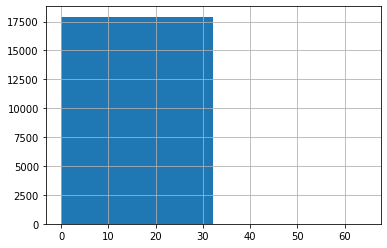

In [120]:
import matplotlib
#matplotlib.pyplot.scatter(engt_df['engagement_score'])

engt_df['engagement_score'].hist(bins=2)

### Logistic Regression

In [134]:
q3=np.percentile(engt_df['engagement_score'], 75)
top_quartile=engt_df[engt_df['engagement_score']>q3]
top_quartile['username'].unique()

array(['@tim_cook', '@elonmusk', '@anandmahindra', '@benioff',
       '@boeingceo', '@eldsjal', '@johnlegere', '@sundarpichai', '@levie',
       '@lloydblankfein', '@michaeldell', '@satyanadella',
       '@waltbettinger', '@marissamayer', '@jack', '@aneelb', '@mtbarra',
       '@drewhouston', '@indranooyi', '@westernunionceo', '@chuckrobbins',
       '@jeffbezos', '@lisasu'], dtype=object)

### Top Quartile engagement score

In [135]:
y_eng_top= engt_df['engagement_score']
X_eng_top=engt_df[['glasdoor_ceo_approval',  'sentiment_score', 'work', 'business', 'emotion', 'social', 'technology',
 'general', 'personal', 'product', 'politics', 
 'apple', 'tesla', 'mahindra', 'boeing', 'spotify', 'tmobile', 'google', 'box',
 'goldman', 'dell',  'news_corp',  'microsoft', 'schwabs',  'yahoo',
 'okta', 'twitter', 'workday', 'general1_motors',
 'dropbox', 'pepsico', 'westernunion', 'cisco', 'amazon', 'amd']]

In [136]:
#Engagement model-top quartile
eng_model_top = sm.OLS(y_eng_top, X_eng_top).fit()
eng_model_top.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       engagement_score   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     28.93
Date:                Tue, 03 Dec 2019   Prob (F-statistic):          2.75e-179
Time:                        19:32:14   Log-Likelihood:                -35606.
No. Observations:               17933   AIC:                         7.128e+04
Df Residuals:                   17898   BIC:                         7.155e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
glasdoor_ceo_approval     0.1908      0.042      4.572      0.000       0.109       0.273
sentiment_score          -0.1143      0.046     -2.468      0.014      -0.205      -0.024
work                     -0.0558      0.045     -1.253      0.210      -0.143       0.031
business                 -0.0954      0.038     -2.536      0.011      -0.169      -0.022
emotion                   0.0376      0.042      0.896      0.370      -0.045       0.120
social                    0.0717      0.043      1.669      0.095      -0.013       0.156
technology               -0.2249      0.055     -4.089      0.000      -0.333      -0.117
general                  -0.1202      0.087     -1.386      0.166      -0.290       0.050
personal                  0.1933      0.073      2.665      0.008       0.051       0.335
product                  -0.0852      0.052     -1.640      0.101      -0.187       0.017
politics                  0.7711      0.127      6.054      0.000       0.521       1.021
apple                     0.5649      0.093      6.045      0.000       0.382       0.748
tesla                     1.1401      0.053     21.323      0.000       1.035       1.245
mahindra                  0.0317      0.053      0.602      0.547      -0.072       0.135
boeing                   -0.0466      0.094     -0.495      0.621      -0.231       0.138
spotify                  -0.1116      0.122     -0.913      0.361      -0.351       0.128
tmobile                  -0.1415      0.053     -2.662      0.008      -0.246      -0.037
google                    0.1168      0.099      1.180      0.238      -0.077       0.311
box                       0.1472      0.092      1.606      0.108      -0.032       0.327
goldman                   0.1081      0.225      0.480      0.631      -0.333       0.549
dell                     -0.0682      0.071     -0.955      0.339      -0.208       0.072
news_corp                -0.0900      1.764     -0.051      0.959      -3.548       3.368
microsoft                -0.0005      0.090     -0.005      0.996      -0.177       0.176
schwabs                  -0.1043      0.094     -1.112      0.266      -0.288       0.080
yahoo                     0.2047      0.225      0.911      0.363      -0.236       0.645
okta                     -0.1222      0.167     -0.731      0.465      -0.450       0.205
twitter                   0.1261      0.048      2.611      0.009       0.031       0.221
workday                  -0.0146      0.192     -0.076      0.939      -0.390       0.361
general1_motors          -0.0254      0.130     -0.195      0.845      -0.281       0.230
dropbox                  -0.0823      0.309     -0.266      0.790      -0.688       0.523
pepsico                  -0.1338      0.178     -0.753      0.452      -0.482       0.215
westernunion           

#### Logistic Regression

In [166]:
#Binning :
engagement_median = engt_df['engagement_score'].median()
engt_df["engagement"] = engt_df['engagement_score'].apply(lambda x: 1 if x > engagement_median else 0)

C:\Users\aishw\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [170]:

#clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X_eng_top,engt_df["engagement"] ) 

logit1 = sm.Logit(engt_df["engagement"], X_eng_top)
result = logit.fit()
result.summary()

         Current function value: 0.467272
         Iterations: 35


C:\Users\aishw\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             engagement   No. Observations:                17933
Model:                          Logit   Df Residuals:                    17898
Method:                           MLE   Df Model:                           34
Date:                Tue, 03 Dec 2019   Pseudo R-squ.:                  0.3259
Time:                        20:08:53   Log-Likelihood:                -8379.6
converged:                      False   LL-Null:                       -12430.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
glasdoor_ceo_approval    -0.9768      0.054    -18.254      0.000      -1.082      -0.872
sentiment_score          -0.1265      0.066     -1.915      0.055      -0.256       0.003
work                      0.1024      0.062      1.663      0.096      -0.018       0.223
business                 -0.0061      0.052     -0.116      0.908      -0.109       0.097
emotion                   0.1464      0.059      2.480      0.013       0.031       0.262
social                    0.2087      0.060      3.490      0.000       0.091       0.326
technology                0.2388      0.082      2.927      0.003       0.079       0.399
general                  -0.2225      0.121     -1.844      0.065      -0.459       0.014
personal                  0.4039      0.100      4.049      0.000       0.208       0.599
product                   0.1752      0.078      2.232      0.026       0.021       0.329
politics                 -0.1969      0.168     -1.175      0.240      -0.525       0.132
apple                     6.8001      1.002      6.785      0.000       4.836       8.764
tesla                    22.7127   1145.983      0.020      0.984   -2223.372    2268.797
mahindra                  1.9033      0.067     28.444      0.000       1.772       2.034
boeing                   -0.2482      0.119     -2.090      0.037      -0.481      -0.015
spotify                  -1.0508      0.198     -5.300      0.000      -1.439      -0.662
tmobile                  -0.4512      0.071     -6.348      0.000      -0.591      -0.312
google                    2.7721      0.164     16.870      0.000       2.450       3.094
box                       1.5429      0.113     13.699      0.000       1.322       1.764
goldman                   4.9658      1.009      4.920      0.000       2.988       6.944
dell                      0.5663      0.084      6.726      0.000       0.401       0.731
news_corp                -7.7098     60.011     -0.128      0.898    -125.329     109.909
microsoft                 2.4264      0.133     18.264      0.000       2.166       2.687
schwabs                  -4.1394      0.581     -7.122      0.000      -5.279      -3.000
yahoo                     0.2048      0.264      0.775      0.438      -0.313       0.723
okta                     -3.9125      1.005     -3.891      0.000      -5.883      -1.942
twitter                   0.6611      0.058     11.411      0.000       0.548       0.775
workday                  -0.4517      0.264     -1.712      0.087      -0.969       0.065
general1_motors           0.0275      0.153      0.180      0.857      -0.273       0.328
dropbox                  -0.0585      0.383     -0.153      0.879      -0.809       0.692
pepsico                   0.2217      0.209      1.061      0.289      -0.188       0.631
westernunion             -1.8531      0.137    -13.576      0.000      -2.121      -1.586
cisco                     0.0405      0.089      0.455      0.649      -0.134       0.215
a